In [1]:
# Import Libs

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Read csv files

cab = pd.read_csv("Cab_Data.csv")
city = pd.read_csv("City.csv")
customer = pd.read_csv("Customer_ID.csv")
transaction = pd.read_csv("Transaction_ID.csv")

In [3]:
cab.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,08-01-2016,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,06-01-2016,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,02-01-2016,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,07-01-2016,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,03-01-2016,Pink Cab,ATLANTA GA,8.73,114.62,97.776


In [4]:
city.head()

,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"
3,MIAMI FL,"1,339,155","17,675"
4,SILICON VALLEY,"1,177,609","27,247"


In [5]:
customer.head()

,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536


In [6]:
transaction.head()

,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card


In [7]:
df_1 = pd.merge(cab, city, on="City")
df_1.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Population,Users
0,10000011,08-01-2016,Pink Cab,ATLANTA GA,30.45,370.95,313.635,"814,885","24,701"
1,10000012,06-01-2016,Pink Cab,ATLANTA GA,28.62,358.52,334.854,"814,885","24,701"
2,10000013,02-01-2016,Pink Cab,ATLANTA GA,9.04,125.20,97.632,"814,885","24,701"
3,10000014,07-01-2016,Pink Cab,ATLANTA GA,33.17,377.40,351.602,"814,885","24,701"
4,10000015,03-01-2016,Pink Cab,ATLANTA GA,8.73,114.62,97.776,"814,885","24,701"


In [8]:
df_2 = pd.merge(customer, transaction, on="Customer ID")
df_2.head()

,Customer ID,Gender,Age,Income (USD/Month),Transaction ID,Payment_Mode
0,29290,Male,28,10813,10000011,Card
1,29290,Male,28,10813,10351127,Cash
2,29290,Male,28,10813,10412921,Card
3,27703,Male,27,9237,10000012,Card
4,27703,Male,27,9237,10320494,Card


In [10]:
df = pd.merge(df_1, df_2, on="Transaction ID")
df.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Population,Users,Customer ID,Gender,Age,Income (USD/Month),Payment_Mode
0,10000011,08-01-2016,Pink Cab,ATLANTA GA,30.45,370.95,313.635,"814,885","24,701",29290,Male,28,10813,Card
1,10000012,06-01-2016,Pink Cab,ATLANTA GA,28.62,358.52,334.854,"814,885","24,701",27703,Male,27,9237,Card
2,10000013,02-01-2016,Pink Cab,ATLANTA GA,9.04,125.20,97.632,"814,885","24,701",28712,Male,53,11242,Cash
3,10000014,07-01-2016,Pink Cab,ATLANTA GA,33.17,377.40,351.602,"814,885","24,701",28020,Male,23,23327,Cash
4,10000015,03-01-2016,Pink Cab,ATLANTA GA,8.73,114.62,97.776,"814,885","24,701",27182,Male,33,8536,Card


In [11]:
# To analyse trends over a time period

df['Date of Travel'] = pd.to_datetime(df['Date of Travel'])
df['Day'] = df['Date of Travel'].dt.day
df['Week'] = df['Date of Travel'].dt.week
df['Month'] = df['Date of Travel'].dt.month
df['Year'] = df['Date of Travel'].dt.year
df['Profit'] = df['Price Charged'] - df['Cost of Trip']
df.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Population,Users,Customer ID,Gender,Age,Income (USD/Month),Payment_Mode,Day,Week,Month,Year,Profit
0,10000011,2016-08-01,Pink Cab,ATLANTA GA,30.45,370.95,313.635,"814,885","24,701",29290,Male,28,10813,Card,1,31,8,2016,57.315
1,10000012,2016-06-01,Pink Cab,ATLANTA GA,28.62,358.52,334.854,"814,885","24,701",27703,Male,27,9237,Card,1,22,6,2016,23.666
2,10000013,2016-02-01,Pink Cab,ATLANTA GA,9.04,125.20,97.632,"814,885","24,701",28712,Male,53,11242,Cash,1,5,2,2016,27.568
3,10000014,2016-07-01,Pink Cab,ATLANTA GA,33.17,377.40,351.602,"814,885","24,701",28020,Male,23,23327,Cash,1,26,7,2016,25.798
4,10000015,2016-03-01,Pink Cab,ATLANTA GA,8.73,114.62,97.776,"814,885","24,701",27182,Male,33,8536,Card,1,9,3,2016,16.844


In [12]:
df.sort_values(by='Date of Travel', inplace=True)
df.set_index('Date of Travel', inplace=True)
df.head()

,Transaction ID,Company,City,KM Travelled,Price Charged,Cost of Trip,Population,Users,Customer ID,Gender,Age,Income (USD/Month),Payment_Mode,Day,Week,Month,Year,Profit
Date of Travel,,,,,,,,,,,,,,,,,,
2016-01-02,10004899,Yellow Cab,LOS ANGELES CA,25.53,402.89,327.8052,"1,595,037","144,132",7219,Male,18,13980,Cash,2,53,1,2016,75.0848
2016-01-02,10005402,Yellow Cab,WASHINGTON DC,44.08,694.53,587.1456,"418,859","127,001",53869,Female,34,6570,Card,2,53,1,2016,107.3844
2016-01-02,10004271,Pink Cab,BOSTON MA,38.61,358.05,405.4050,"248,968","80,021",59321,Male,45,22849,Cash,2,53,1,2016,-47.3550
2016-01-02,10004399,Pink Cab,SAN DIEGO CA,4.72,50.88,51.9200,"959,307","69,995",19497,Male,30,11978,Card,2,53,1,2016,-1.0400
2016-01-02,10005419,Yellow Cab,WASHINGTON DC,46.00,765.04,552.0000,"418,859","127,001",53389,Male,26,2702,Cash,2,53,1,2016,213.0400


In [131]:
df.tail()

,Transaction ID,Company,City,KM Travelled,Price Charged,Cost of Trip,Population,Users,Customer ID,Gender,Age,Income (USD/Month),Payment_Mode,Day,Week,Month,Year,Profit
Date of Travel,,,,,,,,,,,,,,,,,,
2018-12-31,10435303,Yellow Cab,NEW YORK NY,39.20,1000.88,508.0320,"8,405,837","302,149",46,Female,37,19348,Card,31,1,12,2018,492.8480
2018-12-31,10435591,Yellow Cab,NEW YORK NY,37.74,918.58,511.7544,"8,405,837","302,149",1049,Female,40,23646,Card,31,1,12,2018,406.8256
2018-12-31,10434932,Yellow Cab,LOS ANGELES CA,22.88,396.35,315.7440,"1,595,037","144,132",6646,Female,31,7722,Cash,31,1,12,2018,80.6060
2018-12-31,10437814,Yellow Cab,BOSTON MA,17.10,238.07,240.0840,"248,968","80,021",59185,Female,42,11396,Card,31,1,12,2018,-2.0140
2018-12-31,10438259,Yellow Cab,DALLAS TX,34.00,635.45,428.4000,"942,908","22,157",25004,Female,40,10758,Cash,31,1,12,2018,207.0500


In [137]:
df.shape

(359392, 18)

In [13]:
df.describe()

,Transaction ID,KM Travelled,Price Charged,Cost of Trip,Customer ID,Age,Income (USD/Month),Day,Week,Month,Year,Profit
count,3.593920e+05,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000
mean,1.022076e+07,22.567254,423.443311,286.190113,19191.652115,35.336705,15048.822937,15.972835,29.262307,7.156047,2017.045199,137.253198
std,1.268058e+05,12.233526,274.378911,157.993661,21012.412463,12.594234,7969.409482,8.503010,15.044277,3.413283,0.800239,160.311840
min,1.000001e+07,1.900000,15.600000,19.000000,1.000000,18.000000,2000.000000,1.000000,1.000000,1.000000,2016.000000,-220.060000
25%,1.011081e+07,12.000000,206.437500,151.200000,2705.000000,25.000000,8424.000000,9.000000,17.000000,4.000000,2016.000000,28.012000
50%,1.022104e+07,22.440000,386.360000,282.480000,7459.000000,33.000000,14685.000000,16.000000,31.000000,8.000000,2017.000000,81.962000
75%,1.033094e+07,32.960000,583.660000,413.683200,36078.000000,42.000000,21035.000000,23.000000,42.000000,10.000000,2018.000000,190.030000
max,1.044011e+07,48.000000,2048.030000,691.200000,60000.000000,65.000000,35000.000000,31.000000,53.000000,12.000000,2018.000000,1463.966000


### From the above table it is clear that Price Charged and Profit has some outliers

In [14]:
df.isnull().sum()

Transaction ID        0
Company               0
City                  0
KM Travelled          0
Price Charged         0
Cost of Trip          0
Population            0
Users                 0
Customer ID           0
Gender                0
Age                   0
Income (USD/Month)    0
Payment_Mode          0
Day                   0
Week                  0
Month                 0
Year                  0
Profit                0
dtype: int64

### There are no missing values

In [100]:
df.nunique()

Transaction ID        359392
Company                    2
City                      19
KM Travelled             874
Price Charged          99176
Cost of Trip           16291
Population                19
Users                     19
Customer ID            46148
Gender                     2
Age                       48
Income (USD/Month)     22725
Payment_Mode               2
Day                       31
Week                      53
Month                     12
Year                       3
Profit                303907
dtype: int64

### There are 2 cab service provider in 19 different cities

In [16]:
df['City'].value_counts()

NEW YORK NY       99885
CHICAGO IL        56625
LOS ANGELES CA    48033
WASHINGTON DC     43737
BOSTON MA         29692
SAN DIEGO CA      20488
SILICON VALLEY     8519
SEATTLE WA         7997
ATLANTA GA         7557
DALLAS TX          7017
MIAMI FL           6454
AUSTIN TX          4896
ORANGE COUNTY      3982
DENVER CO          3825
NASHVILLE TN       3010
SACRAMENTO CA      2367
PHOENIX AZ         2064
TUCSON AZ          1931
PITTSBURGH PA      1313
Name: City, dtype: int64

### New York city has most no. of cabs running

In [17]:
city_grp = df.groupby('City')

In [18]:
city_grp['Company'].value_counts()

City            Company   
ATLANTA GA      Yellow Cab     5795
                Pink Cab       1762
AUSTIN TX       Yellow Cab     3028
                Pink Cab       1868
BOSTON MA       Yellow Cab    24506
                Pink Cab       5186
CHICAGO IL      Yellow Cab    47264
                Pink Cab       9361
DALLAS TX       Yellow Cab     5637
                Pink Cab       1380
DENVER CO       Yellow Cab     2431
                Pink Cab       1394
LOS ANGELES CA  Yellow Cab    28168
                Pink Cab      19865
MIAMI FL        Yellow Cab     4452
                Pink Cab       2002
NASHVILLE TN    Pink Cab       1841
                Yellow Cab     1169
NEW YORK NY     Yellow Cab    85918
                Pink Cab      13967
ORANGE COUNTY   Yellow Cab     2469
                Pink Cab       1513
PHOENIX AZ      Yellow Cab     1200
                Pink Cab        864
PITTSBURGH PA   Pink Cab        682
                Yellow Cab      631
SACRAMENTO CA   Pink Cab       1334
 

### Distribution of the two cab services across different cities

In [20]:
city_grp['Income (USD/Month)'].agg(['median', 'mean', 'min', 'max'])

,median,mean,min,max
City,,,,
ATLANTA GA,14655,14933.150986,2029,34972
AUSTIN TX,14374,14696.495711,2027,34921
BOSTON MA,14743,15128.563317,2019,34985
CHICAGO IL,14527,15101.718269,2007,34901
DALLAS TX,14242,14846.508194,2007,34996
DENVER CO,14580,14975.655163,2022,35000
LOS ANGELES CA,14889,15064.550455,2007,34984
MIAMI FL,14759,14984.887202,2013,34862
NASHVILLE TN,14195,14734.359801,2002,34960


### Each city has more or less similiar Income range

In [22]:
city_cabs = city_grp['Company'].value_counts()

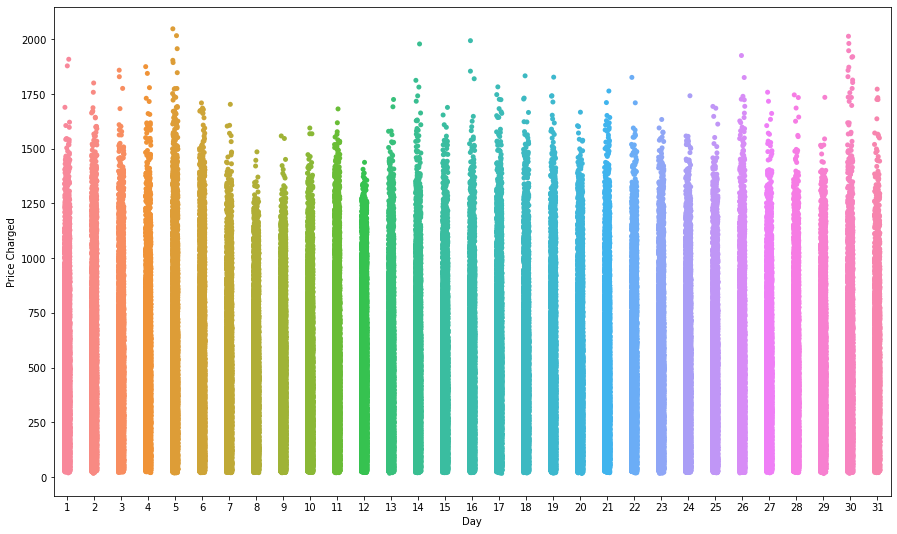

In [28]:
plt.figure(figsize=(15,9))
sns.stripplot(x="Day", y="Price Charged", data = df)
plt.show()

### There is some amount of seasonality over a month

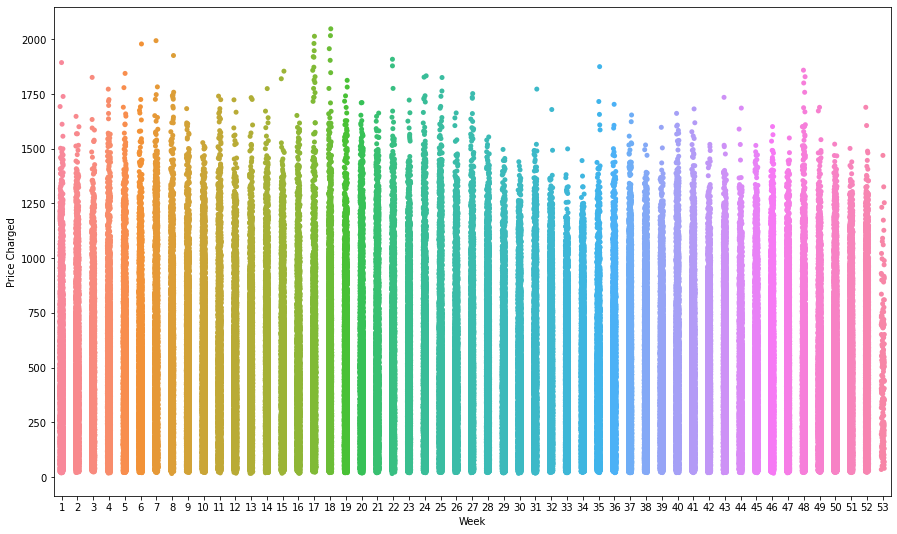

In [29]:
plt.figure(figsize=(15,9))
sns.stripplot(x="Week", y="Price Charged", data = df)
plt.show()

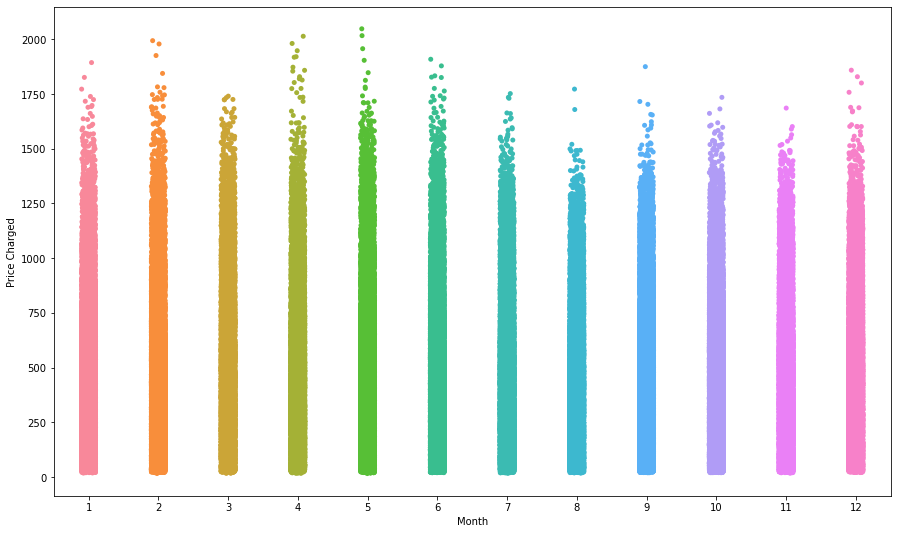

In [30]:
plt.figure(figsize=(15,9))
sns.stripplot(x="Month", y="Price Charged", data = df)
plt.show()

### In the 2nd quarter i.e. during the months of April, May and June no. of cabs taken is higher in a year

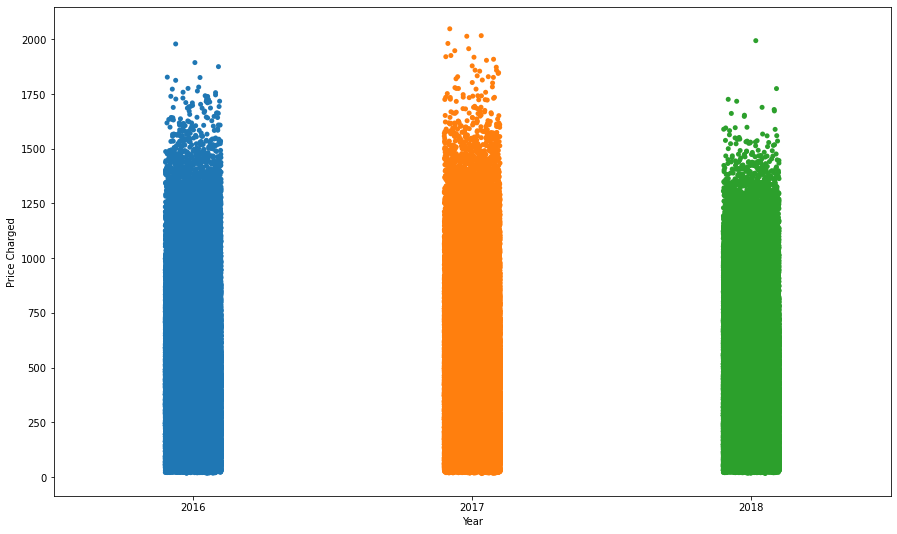

In [32]:
plt.figure(figsize=(15,9))
sns.stripplot(x="Year", y="Price Charged", data = df)
plt.show()

### In 2018 price charged was comparatively less than 2017 and 2016

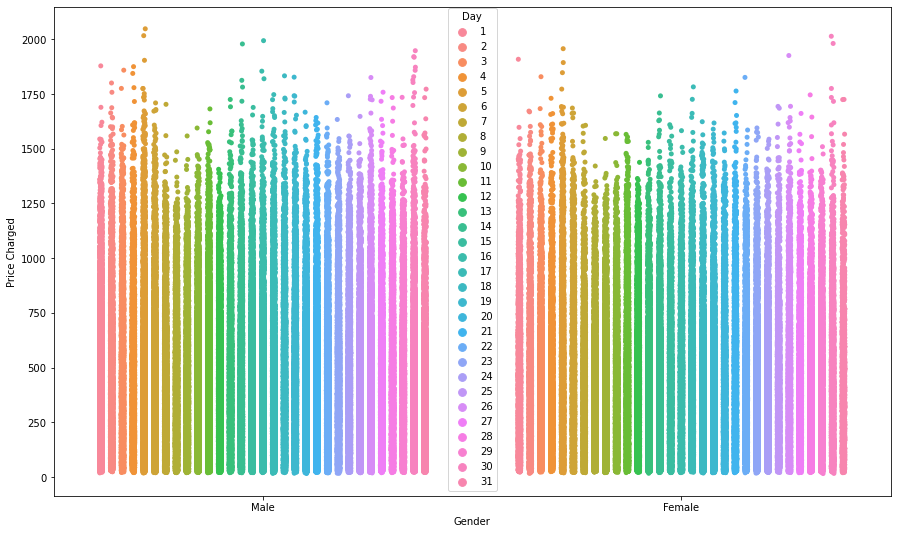

In [35]:
plt.figure(figsize=(15,9))
sns.stripplot(x="Gender", y="Price Charged", hue="Day", data = df, dodge=True)
plt.show()

### There is no discount for Female customers

<Figure size 1080x648 with 0 Axes>

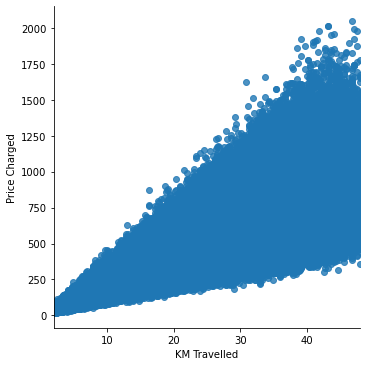

In [55]:
plt.figure(figsize=(15,9))
sns.lmplot(x='KM Travelled', y='Price Charged', data=df, ci=False);
plt.show()

<Figure size 1080x648 with 0 Axes>

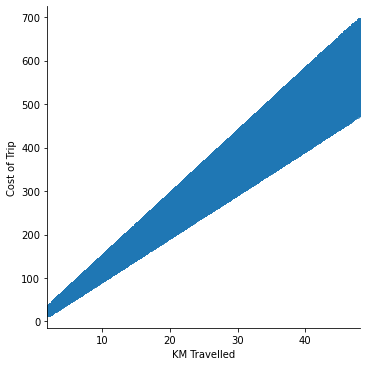

In [56]:
plt.figure(figsize=(15,9))
sns.lmplot(x='KM Travelled', y='Cost of Trip', data=df, ci=False);
plt.show()

### There is more pronounced linear relationship in Cost than Price charged as distance increases

In [67]:
city_cabs.unstack(level=1)

Company,Pink Cab,Yellow Cab
City,,
ATLANTA GA,1762,5795
AUSTIN TX,1868,3028
BOSTON MA,5186,24506
CHICAGO IL,9361,47264
DALLAS TX,1380,5637
DENVER CO,1394,2431
LOS ANGELES CA,19865,28168
MIAMI FL,2002,4452
NASHVILLE TN,1841,1169


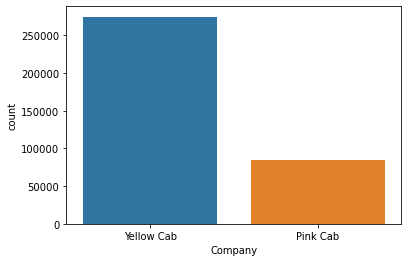

In [76]:
sns.countplot(x='Company', data=df);

### It is clear from the above fig that there are more yellow cabs than pink cabs. About 3x!!

In [15]:
df['Company'].value_counts(normalize=True)

Yellow Cab    0.764294
Pink Cab      0.235706
Name: Company, dtype: float64

### More than 76% cabs running are Yellow Cabs

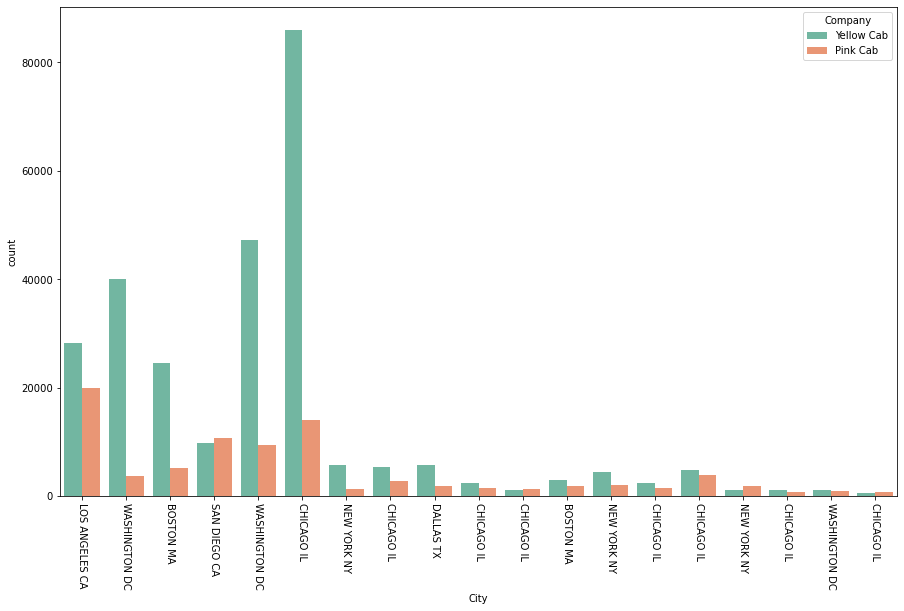

In [92]:
plt.figure(figsize=(15, 9))
g = sns.countplot(x='City', hue='Company', data=df, palette="Set2")
g.set_xticklabels(labels= df['City'],rotation=-90)
plt.show()

### Except San Diego, Chicago and New York 'Yellow Cab' Co. is dominant in all the cities

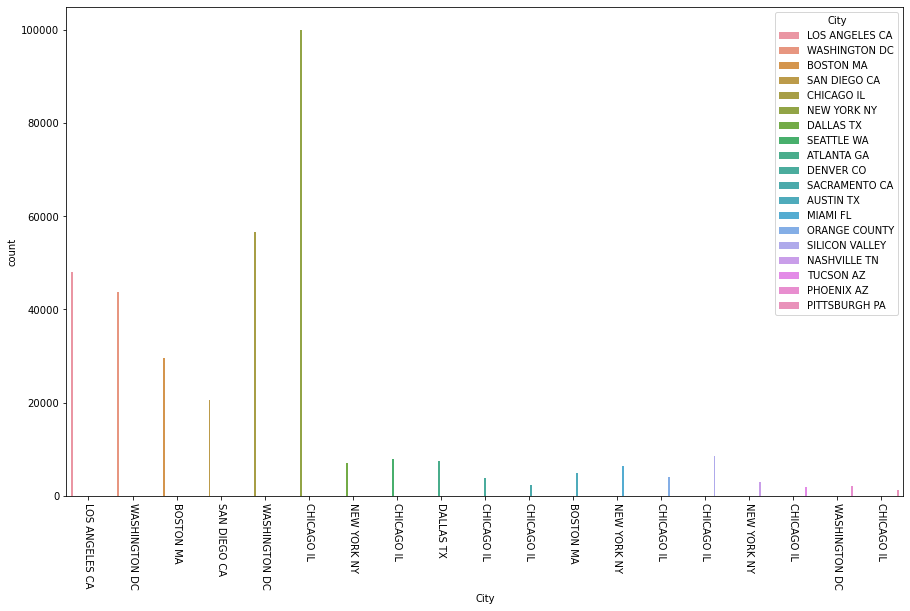

In [95]:
plt.figure(figsize=(15, 9))
g = sns.countplot(x='City', hue='City', data=df)
g.set_xticklabels(labels= df['City'],rotation=-90)
plt.show()

### Chicago has the highest no. of customers for cab service

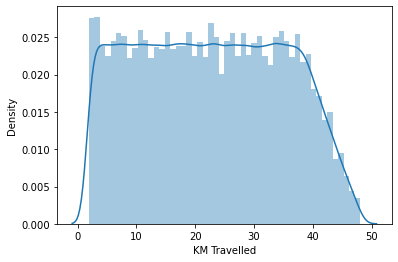

In [97]:
sns.distplot(df["KM Travelled"]);

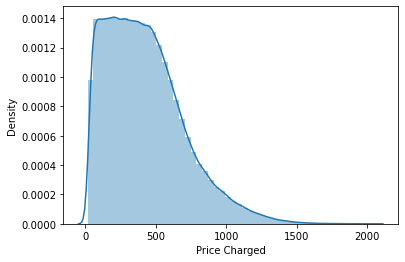

In [98]:
sns.distplot(df["Price Charged"]);

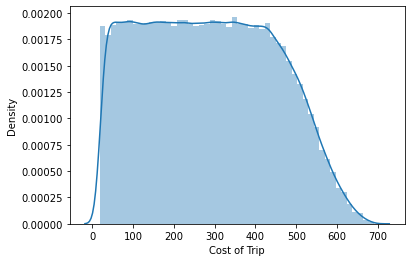

In [99]:
sns.distplot(df["Cost of Trip"]);

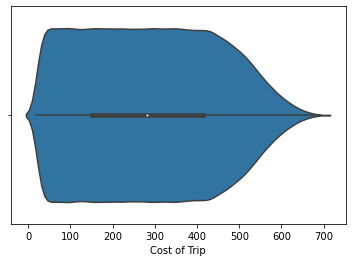

In [106]:
sns.violinplot(df["Cost of Trip"]);

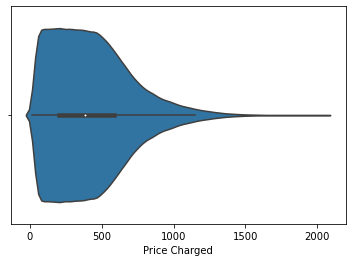

In [107]:
sns.violinplot(df["Price Charged"]);

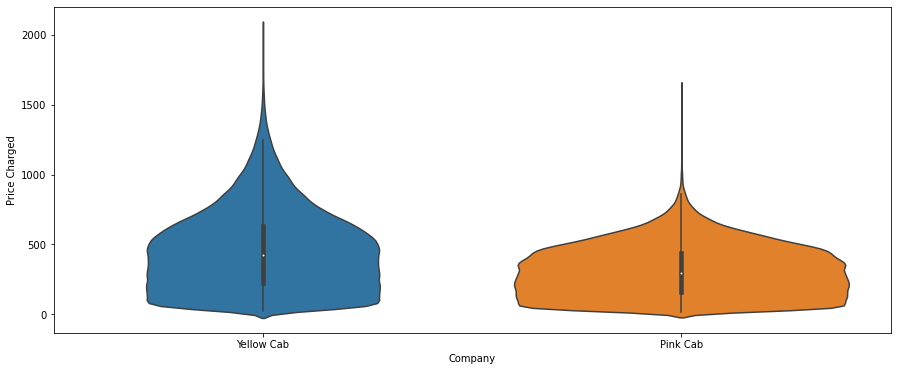

In [120]:
plt.figure(figsize=(15, 6))
sns.violinplot(x='Company', y='Price Charged', data=df)
plt.show()

### From above plots we can see the cost of the trip increases linearly all the time but the price chraged does not seem to follow the same pattern

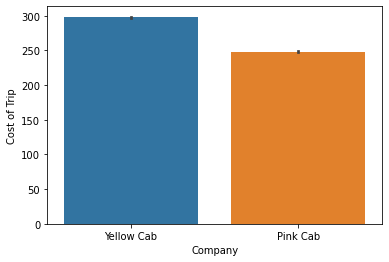

In [104]:
sns.barplot(y='Cost of Trip', x='Company', data=df, estimator=np.mean);

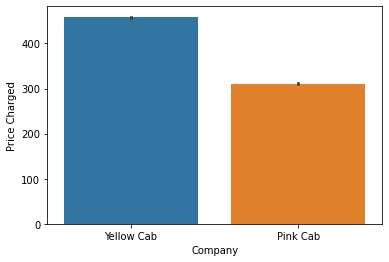

In [105]:
sns.barplot(y='Price Charged', x='Company', data=df, estimator=np.mean);

### Cost and Price both are higher for yellow cabs when compared to pink cabs

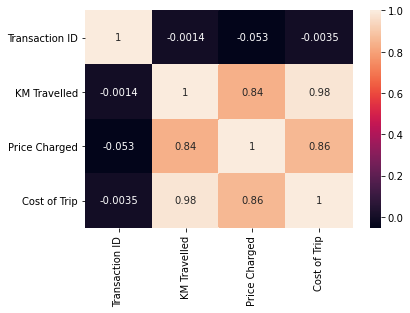

In [108]:
sns.heatmap(cab.corr(), color='b', annot=True);

### Light color => more correlation.
### KM Travelled is strongly correlated to Cost than the Price.

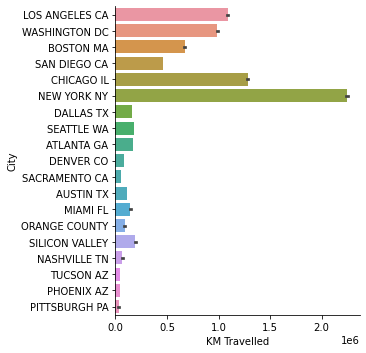

In [111]:
sns.factorplot(kind='bar', x='KM Travelled', y='City', data=df, estimator=np.sum);

### New York City has the highest no. of KM Travelled!

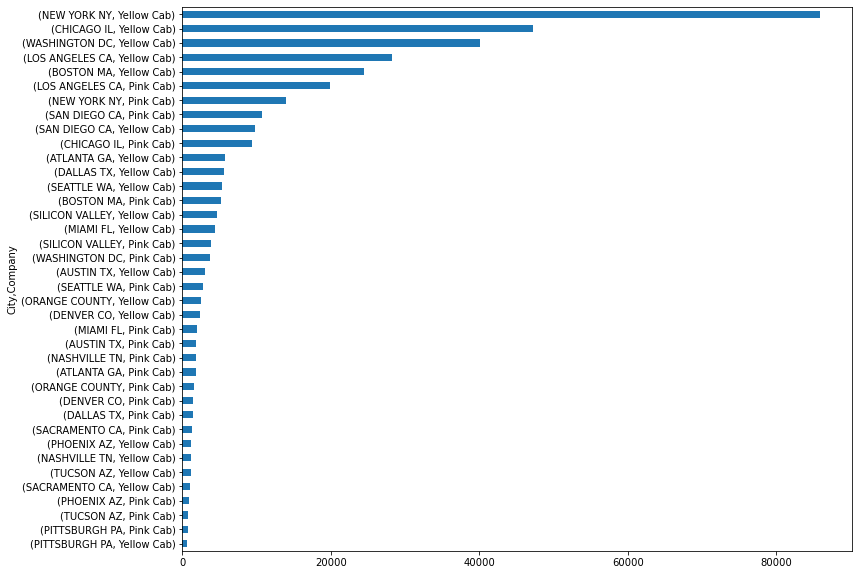

In [112]:
plt.figure(figsize=(12, 10))
df.groupby('City').Company.value_counts().sort_values(ascending=True).plot(kind='barh');

### Again New York City has most of the cabs as Yellow Cabs

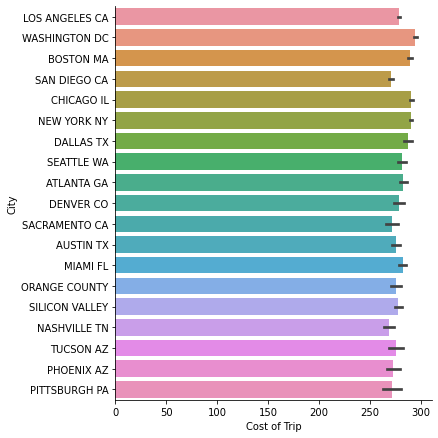

In [114]:
sns.catplot(kind = 'bar', x = 'Cost of Trip', y='City', data = df, estimator = np.mean, height=6);

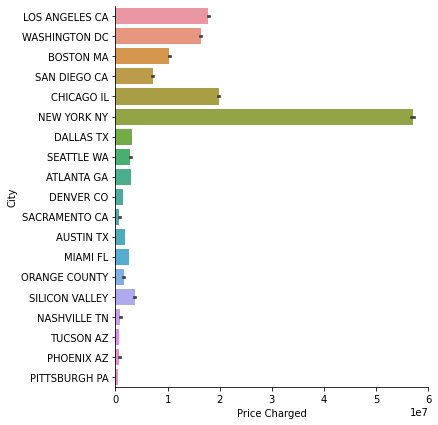

In [115]:
sns.catplot(kind = 'bar', x = 'Price Charged', y = 'City', data = df, estimator = np.sum, height=6);

### Price charged is max for New York City. But the cost is almost the same as other cities. It could mean that New York city is expensive.

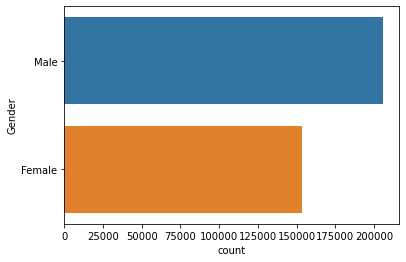

In [116]:
sns.countplot(y = 'Gender', data = df);

### There are about 50 Lakhs more Male customers than female

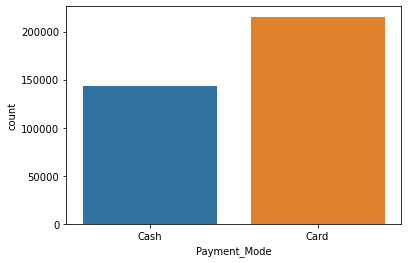

In [118]:
sns.countplot(df['Payment_Mode']);

In [119]:
df['Payment_Mode'].value_counts()

Card    215504
Cash    143888
Name: Payment_Mode, dtype: int64

### Card payment is preferred over cash payment. About 1.5x!!

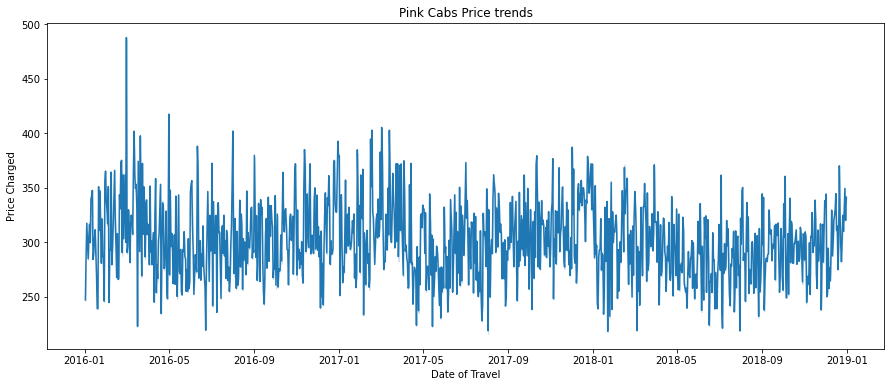

In [128]:
plt.figure(figsize=(15, 6))
sns.lineplot(x='Date of Travel', y='Price Charged', data=df[df['Company'] == 'Pink Cab'], ci=False).set_title("Pink Cabs Price trends")
plt.show()

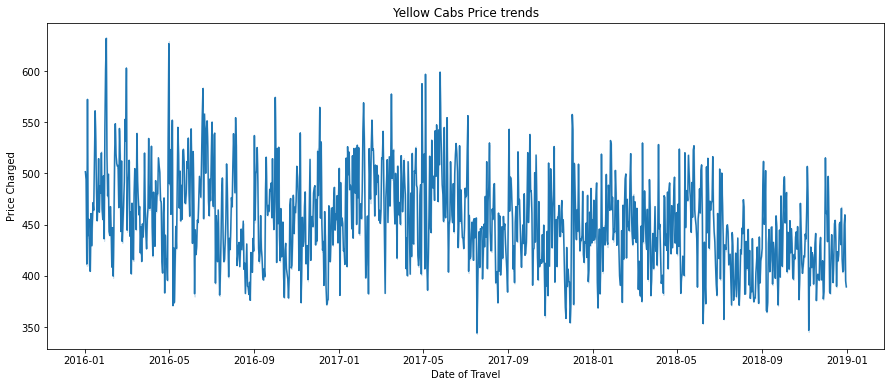

In [127]:
plt.figure(figsize=(15, 6))
sns.lineplot(x='Date of Travel', y='Price Charged', data=df[df['Company'] == 'Yellow Cab'], ci=False).set_title("Yellow Cabs Price trends")
plt.show()

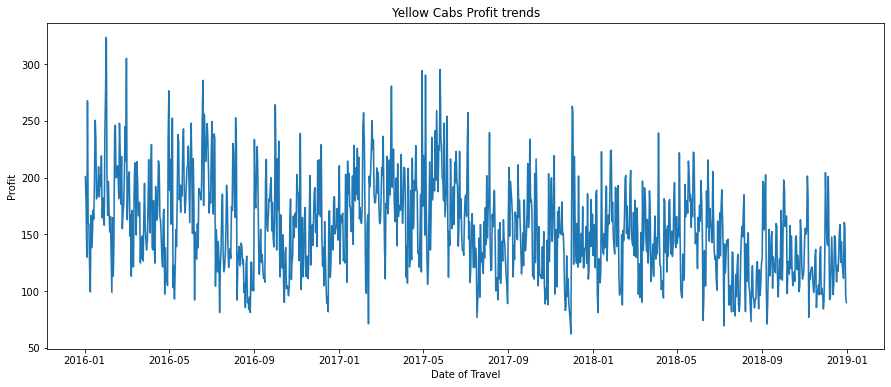

In [129]:
plt.figure(figsize=(15, 6))
sns.lineplot(x='Date of Travel', y='Profit', data=df[df['Company'] == 'Yellow Cab'], ci=False).set_title("Yellow Cabs Profit trends")
plt.show()

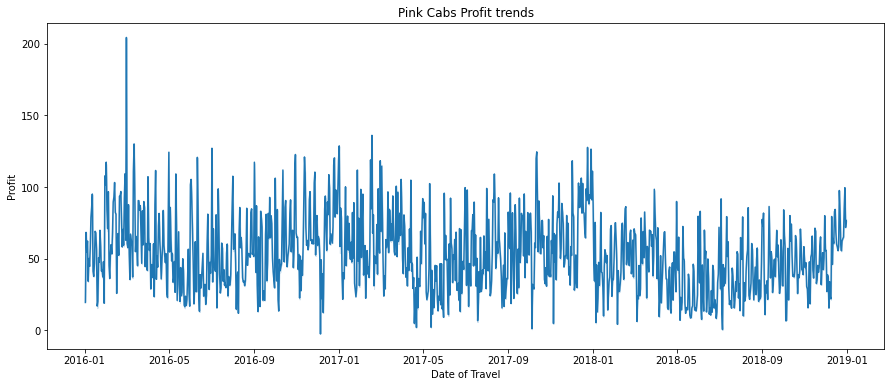

In [130]:
plt.figure(figsize=(15, 6))
sns.lineplot(x='Date of Travel', y='Profit', data=df[df['Company'] == 'Pink Cab'], ci=False).set_title("Pink Cabs Profit trends")
plt.show()

### It is clear that there is some seasonality